In [1]:
import numpy as np
import matplotlib.pyplot as plt
import corner
import sys
sys.path.insert(0, '/global/homes/z/zhzhuoqi/.local/lib/python3.7/site-packages/GetDist-1.1.2-py3.7.egg')
from getdist import plots, MCSamples
import getdist
from getdist.gaussian_mixtures import GaussianND
import sacc
import math

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

# the following commands make plots look better
# try to experiment with these parameters to see what they do
dpi = 200
plt.rcParams['figure.dpi']= dpi
plt.rcParams["figure.figsize"] = (6,4)
plt.rc("savefig", dpi=dpi)
plt.rc('font', size=12)
plt.rc('xtick', direction='in') 
plt.rc('ytick', direction='in')
plt.rc('xtick.major', pad=3) 
plt.rc('xtick.minor', pad=3)
plt.rc('ytick.major', pad=3) 
plt.rc('ytick.minor', pad=3)
plt.rc('lines', dotted_pattern = [2., 2.]) # this makes lines plotted by plt.grid much nicer looking
#if you don't have LaTeX installed on your laptop and this statement 
# generates error, comment it out
#plt.rc('text', usetex=True)

In [3]:
def weighted_avg_and_std(values, weights):
    """
    Return the weighted average and standard deviation.

    values, weights -- Numpy ndarrays with the same shape.
    """
    average = np.average(values, weights=weights)
    # Fast and numerically precise:
    variance = np.average((values-average)**2, weights=weights)
    return (average, math.sqrt(variance))

In [7]:
def get_chain(name):
    samps1 = np.loadtxt(f'{name}/chain.txt')[:].T
    weights1 = np.array(samps1[-1])
    S8 = samps1[1]*np.sqrt((samps1[0]+samps1[2])/0.3)
    sigma = weighted_avg_and_std(S8, weights1)
    
    return sigma

In [8]:
chains = []
foms = np.zeros((5,5))
for i,n in enumerate([3,4,5,6,7]): 
    for j,maglim in enumerate([23.1,23.6,24.1,24.6,25.1]):
        sigma = get_chain(f'yamls/{n}_{maglim}')
        foms[j][i] = sigma[1]

<ipython-input-9-a203e6c9eb78>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_label_list)
<ipython-input-9-a203e6c9eb78>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_label_list)


Text(0.5, 1.0, 'Y1 variant, std($S8$)')

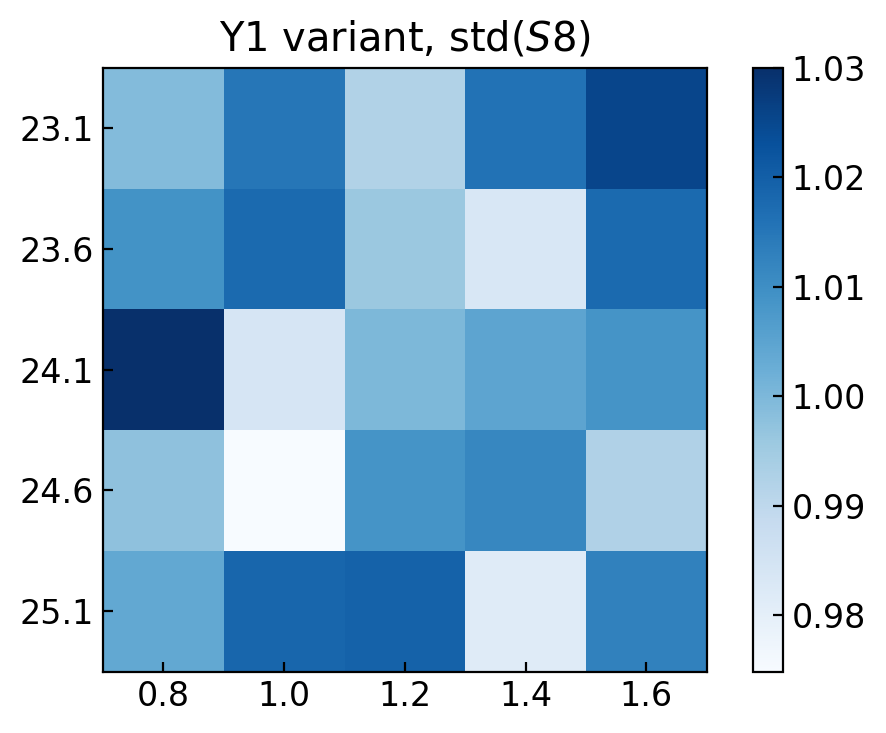

In [9]:
fig, ax = plt.subplots()
im = ax.imshow(foms/foms[2,2],cmap='Blues')#,vmin=0.7, vmax=1.45)
fig.colorbar(im)
x_label_list = ['0','0.8','1.0','1.2', '1.4', '1.6']
ax.set_xticklabels(x_label_list)
y_label_list = ['0','23.1', '23.6', '24.1', '24.6','25.1']
ax.set_yticklabels(y_label_list)
ax.set_title(r'Y1 variant, std($S8$)')